In [16]:
import numpy as np

with open('C:\\Users\\yangz\\Desktop\\FireProjectBatchDownloadNew\\Perimeter\\24_Osgood_146.npy', 'rb') as f:
    savedStack = np.load(f)
    

In [17]:
combinedIndex = savedStack[0]+savedStack[1]+savedStack[2]
combinedIndex = np.divide(combinedIndex, 3)
combinedIndex[combinedIndex>660] = 660
combinedIndex[combinedIndex<-660] = -660
combinedIndexMin = np.min(combinedIndex)
combinedIndexMax = np.max(combinedIndex)
combinedIndex = (combinedIndex-combinedIndexMin)/(combinedIndexMax-combinedIndexMin)


In [18]:
NDWI = savedStack[7]
NDWI[NDWI>2] = 2
NDWI[NDWI<-2] = -2
NDWIMin = np.min(NDWI)
NDWIMax = np.max(NDWI)
NDWI = (NDWI-NDWIMin)/(NDWIMax-NDWIMin)
NDWI = NDWI


In [19]:
result = combinedIndex - NDWI
result[result<0] = 0
resultMin = np.min(result)
resultMax = np.max(result)
result = (result-resultMin)/(resultMax-resultMin)
result = result*660


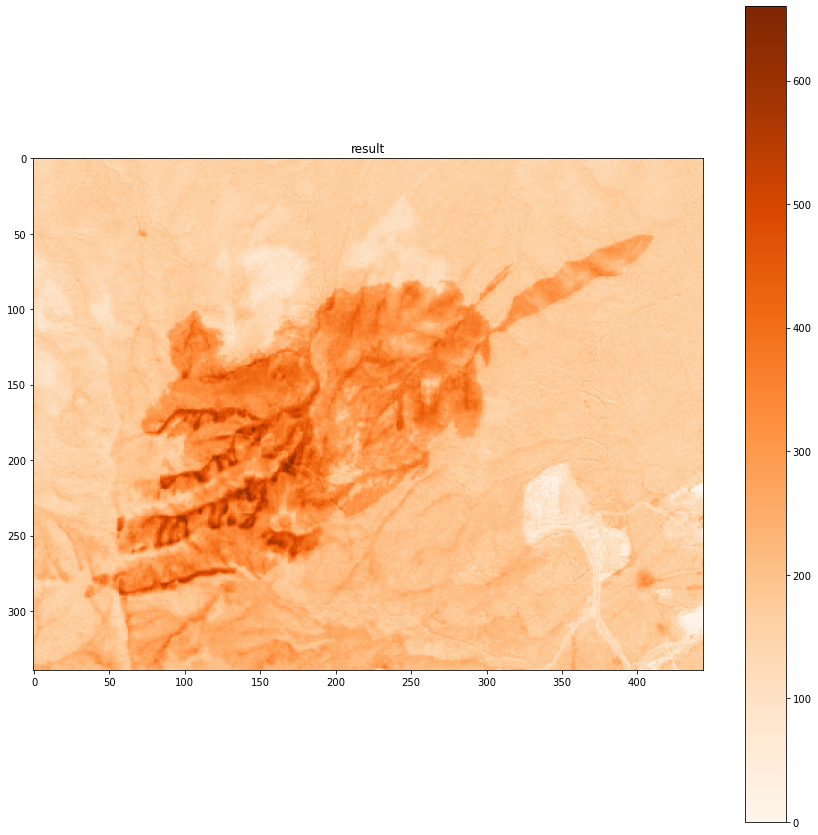

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))
plt.imshow(result, cmap="Oranges")
#plt.clim(-500, 650)
#plt.clim(-1500, 1950)
plt.title("result")
plt.colorbar()
plt.show()


In [21]:
result[result<250] = 0
result[result>250] = 660

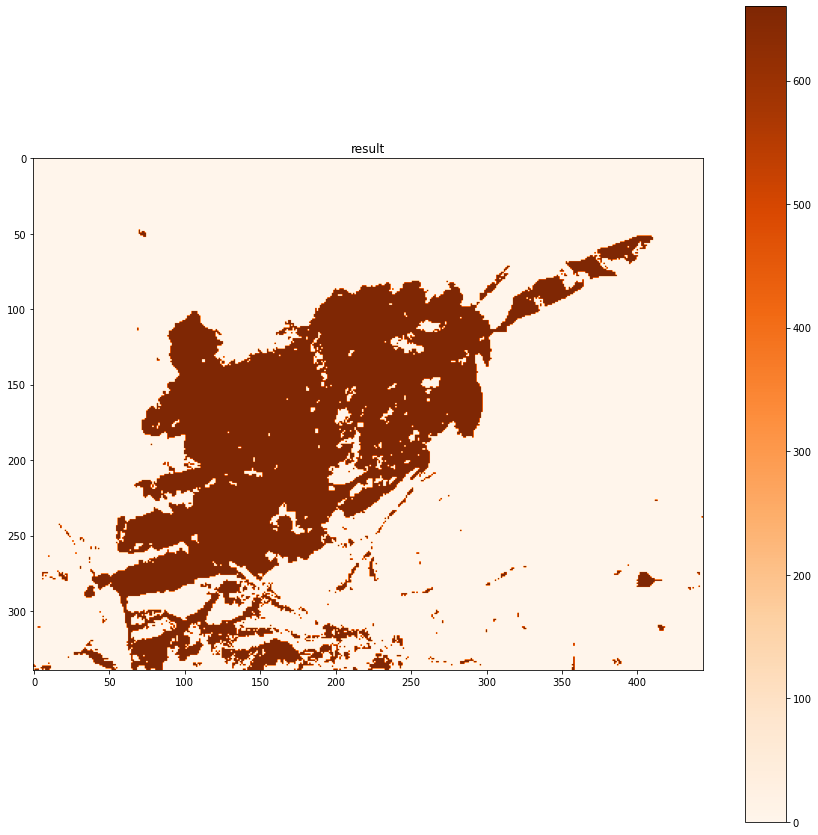

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))
plt.imshow(result, cmap="Oranges")
#plt.clim(-500, 650)
#plt.clim(-1500, 1950)
plt.title("result")
plt.colorbar()
plt.show()

In [23]:
combinedIndex2 = savedStack[6]
combinedIndex2 = np.divide(combinedIndex2, 2)
combinedIndex2[combinedIndex2>=100] = 660
combinedIndex2[combinedIndex2<100] = 0


In [24]:
NDWI2 = savedStack[7]
NDWI2[NDWI2>2] = 2
NDWI2[NDWI2<-2] = -2
NDWI2Min = np.min(NDWI2)
NDWI2Max = np.max(NDWI2)
NDWI2 = (NDWI2-NDWI2Min)/(NDWI2Max-NDWI2Min)
NDWI2[NDWI2>=0.45] = 660
NDWI2[NDWI2<0.45] = 0


In [25]:
result2 = combinedIndex2 - NDWI2
result2[result2<0] = 0


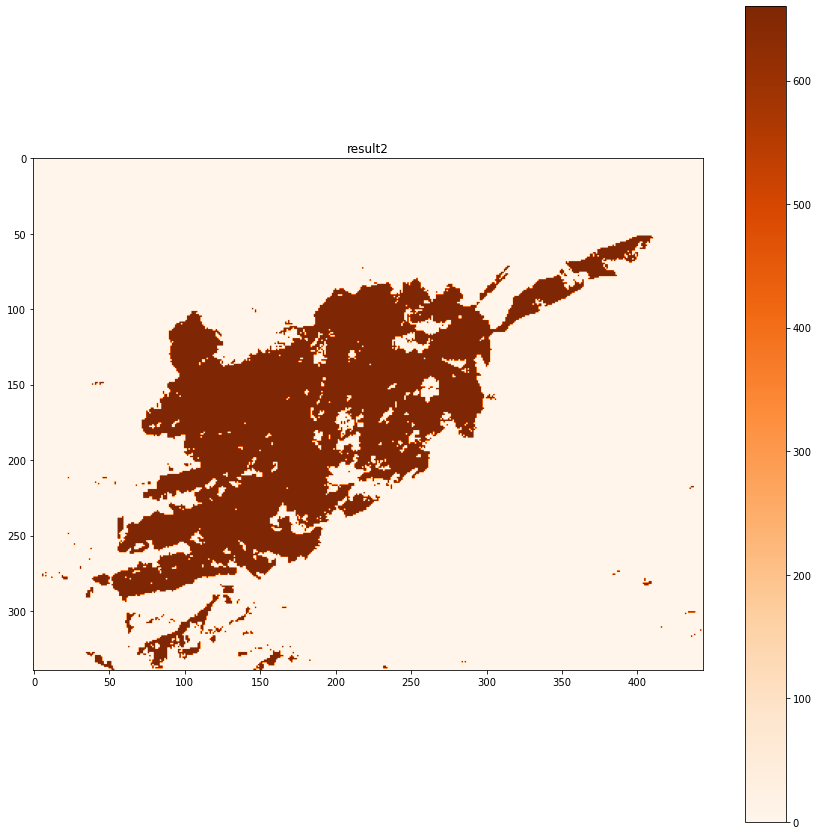

In [26]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))
plt.imshow(result2, cmap="Oranges")
#plt.clim(-500, 650)
#plt.clim(-1500, 1950)
plt.title("result2")
plt.colorbar()
plt.show()


In [27]:
result3 = result+result2
result3[result3<900] = 0
result3[result3>900] = 1


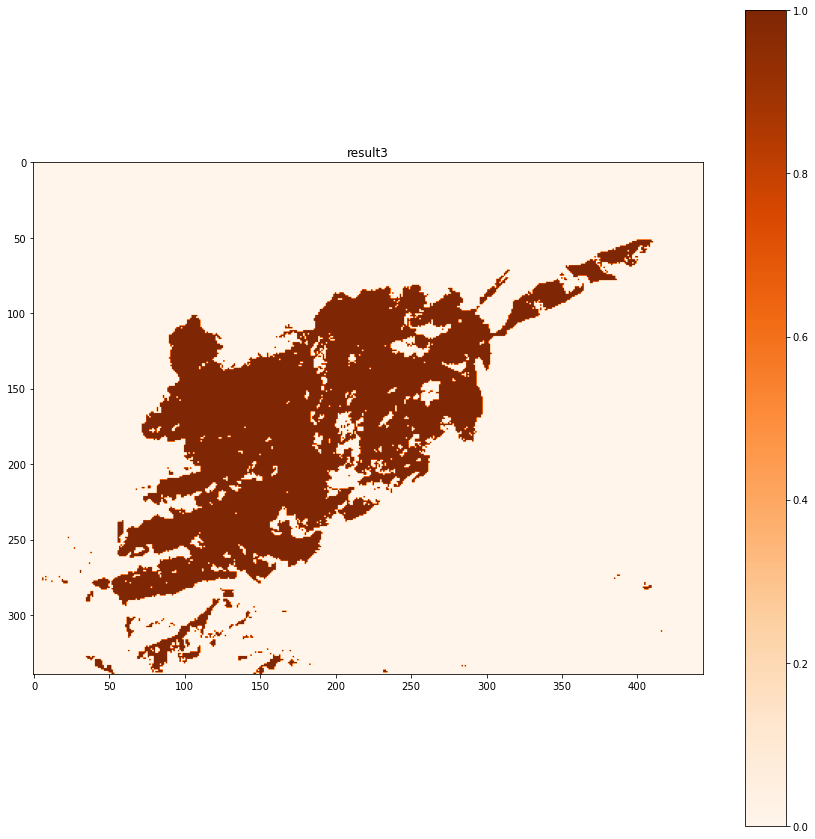

In [28]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))
plt.imshow(result3, cmap="Oranges")
#plt.clim(-500, 650)
#plt.clim(-1500, 1950)
plt.title("result3")
plt.colorbar()
plt.show()

In [29]:
import pandas as pd
pdFires = pd.read_pickle("C:\\Users\\yangz\\Desktop\\FireProject\\pdFires.pkl")

In [33]:
testPoly = pdFires.at[146, "geometry"]

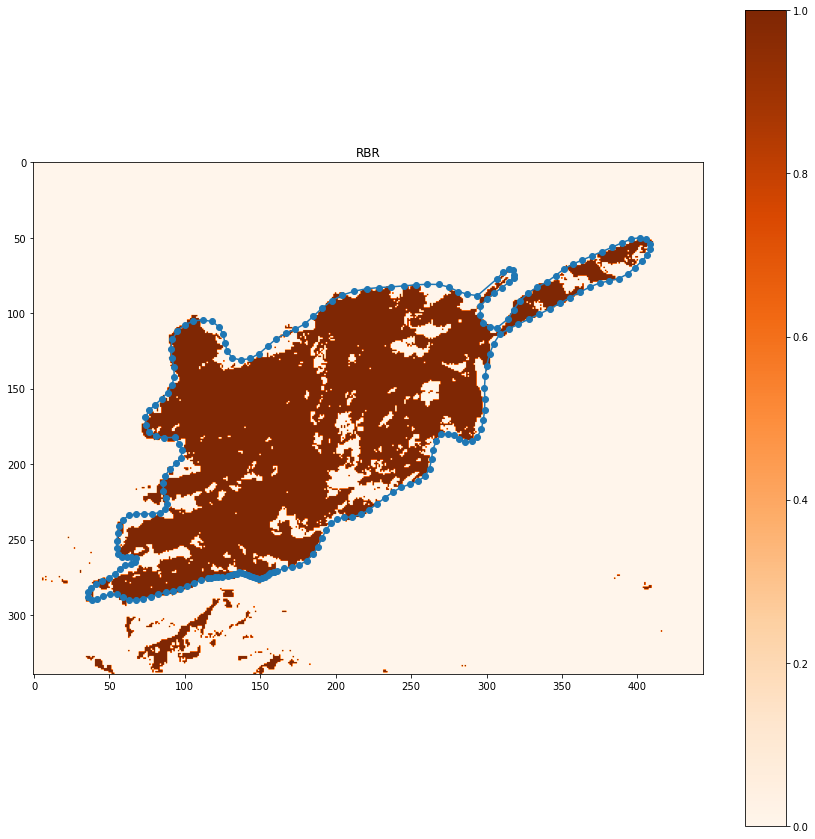

In [34]:
image = result3

fig = plt.figure(figsize=(15,15))
plt.imshow(image,cmap="Oranges")
plt.title("RBR")
#plt.clim(-500, 650)
plt.colorbar()

bounds = list(testPoly.bounds)
bounds[0] = bounds[0]-0.005
bounds[1] = bounds[1]-0.005
bounds[2] = bounds[2]+0.005
bounds[3] = bounds[3]+0.005

xLeft = bounds[0]
yTop = bounds[3]
xDist = abs(bounds[2]-bounds[0])
yDist = abs(bounds[3]-bounds[1])
xDistNew = 444
yDistNew = 340
exteriorList = list(testPoly.exterior.coords)
xNewList = []
yNewList = []
polygonList = []
polygonListSP = []
for each in exteriorList:
    x = each[0]
    y = each[1]
    xNew = ((x-xLeft)/xDist) * xDistNew
    yNew = ((yTop-y)/yDist) * yDistNew
    xNewList.append(xNew)
    yNewList.append(yNew)
    polygonList.append([xNew, yNew])
    polygonListSP.append((xNew, yNew))

plt.plot(xNewList, yNewList, '-o')
plt.show()


In [35]:
polygonArray = np.array(polygonList)


In [36]:
#print (polygonListSP)

In [37]:
from matplotlib import path

In [38]:
p = path.Path(polygonListSP)

In [39]:
p.contains_points([(300, 250)])

array([False])

In [40]:
overLap = 0
union = 0
for i in range (339):
    for j in range (443):
        if p.contains_points([(j, i)])[0] == True:
            union += 1
            if result3[i][j] == 1:
                overLap += 1
        else:
            if result3[i][j] == 1:
                union += 1
            
print (overLap)
print (union)
print (overLap/union)
                

27611
35583
0.7759604305426748
